# random walk 2-d

## mean distance

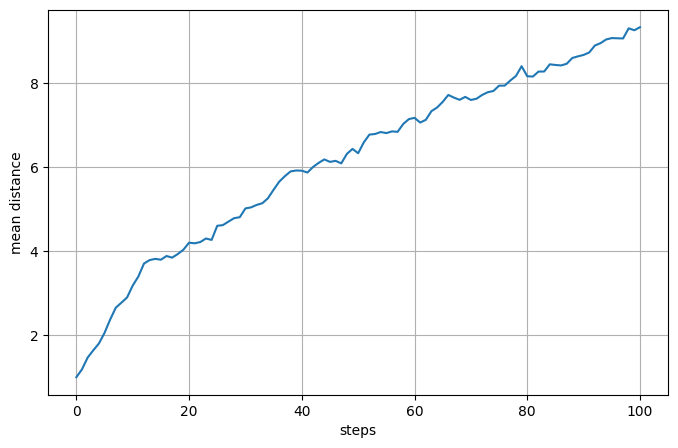

In [ ]:
import random as rnd
import matplotlib.pyplot as plt

Nrep = 50
Nstep = 101

mean_r = [0.0] * Nstep

# simulate random walks
for j in range(Nrep):
    x = 0.0
    y = 0.0
    for i in range(Nstep):
        # random step: one of four directions (N, S, E, W)
        direction = rnd.randint(0, 3)
        if direction == 0:
            x += 1
        elif direction == 1:
            x -= 1
        elif direction == 2:
            y += 1
        else:
            y -= 1

        r2 = x*x + y*y
        mean_r[i] += r2**0.5      # accumulate distance

# average over repetitions
for i in range(Nstep):
    mean_r[i] /= Nrep

# Plot results
plt.figure(figsize=(8,5))
plt.plot(mean_r)
plt.xlabel('steps')
plt.ylabel('mean distance')
plt.grid(True)
plt.show()


## assignment 3
1. Use above code to complete following plot.
2. Explain the influence of `Nrep` on the value of `mean distance`.
3. Cite a reference about it.

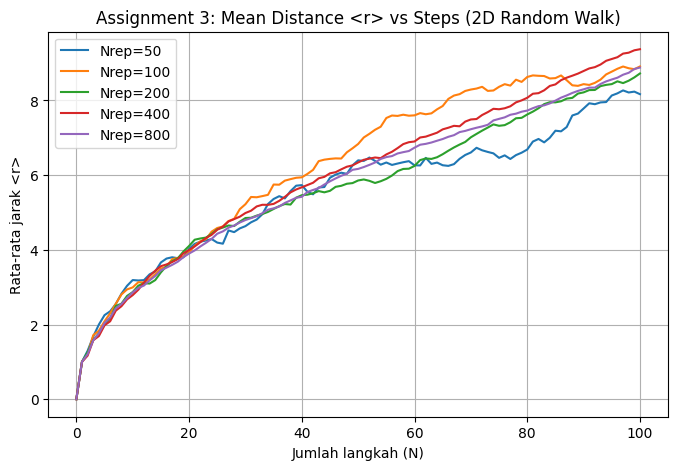

Fitting <r> ~ A * N^alpha (log-log):
  Nrep=50: alpha=0.4115, A=1.1812, R^2=0.9698
  Nrep=100: alpha=0.5161, A=0.8858, R^2=0.9846
  Nrep=200: alpha=0.4687, A=0.9645, R^2=0.9877
  Nrep=400: alpha=0.5099, A=0.8694, R^2=0.9975
  Nrep=800: alpha=0.4938, A=0.8928, R^2=0.9991


In [1]:
# Assignment 3: Mean Distance <r> vs Steps
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- Parameter simulasi ---
Nsteps = 101
Nsteps_array = np.arange(Nsteps)
Nreps_list = [50, 100, 200, 400, 800]

# --- Fungsi simulasi random walk 2D ---
def simulate_random_walk_2d(Nsteps, Nreps):
    mean_r = np.zeros(Nsteps)
    mean_r2 = np.zeros(Nsteps)
    for rep in range(Nreps):
        x = 0
        y = 0
        rs = np.zeros(Nsteps)
        rs2 = np.zeros(Nsteps)
        for step in range(1, Nsteps):
            d = rnd.choice([(1,0),(-1,0),(0,1),(0,-1)])
            x += d[0]
            y += d[1]
            r2 = x**2 + y**2
            rs[step] = np.sqrt(r2)
            rs2[step] = r2
        mean_r += rs
        mean_r2 += rs2
    mean_r /= Nreps
    mean_r2 /= Nreps
    return mean_r, mean_r2

# --- Jalankan simulasi dan plot <r> ---
results = {}
for Nrep in Nreps_list:
    mean_r, mean_r2 = simulate_random_walk_2d(Nsteps, Nrep)
    results[Nrep] = {"mean_r": mean_r, "mean_r2": mean_r2}

plt.figure(figsize=(8,5))
for Nrep in Nreps_list:
    plt.plot(Nsteps_array, results[Nrep]["mean_r"], label=f"Nrep={Nrep}")
plt.xlabel("Jumlah langkah (N)")
plt.ylabel("Rata-rata jarak <r>")
plt.title("Assignment 3: Mean Distance <r> vs Steps (2D Random Walk)")
plt.legend()
plt.grid(True)
plt.show()

# --- Fit log-log untuk <r> ∝ N^α ---
fit_range = (10, Nsteps-1)
logN = np.log(Nsteps_array[fit_range[0]:fit_range[1]+1])

print("Fitting <r> ~ A * N^alpha (log-log):")
for Nrep in Nreps_list:
    y = results[Nrep]["mean_r"][fit_range[0]:fit_range[1]+1]
    logy = np.log(y + 1e-12)
    slope, intercept, r_value, p_value, std_err = stats.linregress(logN, logy)
    A = np.exp(intercept)
    print(f"  Nrep={Nrep}: alpha={slope:.4f}, A={A:.4f}, R^2={r_value**2:.4f}")


## mean squared distance

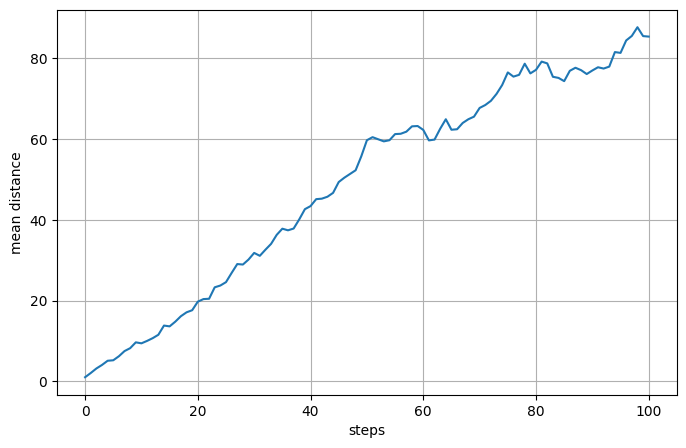

In [ ]:
import random as rnd
import matplotlib.pyplot as plt

Nrep = 50
Nstep = 101

mean_r2 = [0.0] * Nstep

# simulate random walks
for j in range(Nrep):
    x = 0.0
    y = 0.0
    for i in range(Nstep):
        # random step: one of four directions (N, S, E, W)
        direction = rnd.randint(0, 3)
        if direction == 0:
            x += 1
        elif direction == 1:
            x -= 1
        elif direction == 2:
            y += 1
        else:
            y -= 1

        r2 = x*x + y*y
        mean_r2[i] += r2      # accumulate squared distance

# average over repetitions
for i in range(Nstep):
    mean_r2[i] /= Nrep

# Plot results
plt.figure(figsize=(8,5))
plt.plot(mean_r2)
plt.xlabel('steps')
plt.ylabel('mean distance')
plt.grid(True)
plt.show()

## assignment 4
1. Use above code to complete following plot.
2. Explain the influence of `Nrep` on the value of `mean squared distance`.
3. Cite a reference about it.

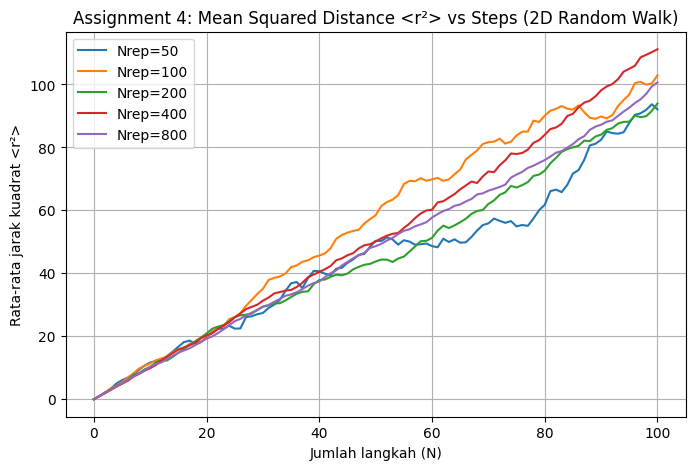

Fitting <r²> ~ C * N (linear fit):
  Nrep=50: slope_through_origin=0.8694, slope_lin=0.8252, R^2=0.9655
  Nrep=100: slope_through_origin=1.0954, slope_lin=1.0579, R^2=0.9846
  Nrep=200: slope_through_origin=0.9134, slope_lin=0.9045, R^2=0.9940
  Nrep=400: slope_through_origin=1.0559, slope_lin=1.0864, R^2=0.9960
  Nrep=800: slope_through_origin=0.9642, slope_lin=0.9650, R^2=0.9989

Kesimpulan:
• <r> tumbuh ∝ N^0.5 (perilaku difusif).
• <r²> tumbuh ∝ N (linear, sesuai teori random walk).

Referensi:
• Hughes, B. D. (1995). Random Walks and Random Environments, Vol.1.
• Weiss, G. H. (1994). Aspects and Applications of the Random Walk.
• Wikipedia: Random walk & Mean squared displacement.


In [2]:
# Assignment 4: Mean Squared Distance <r²> vs Steps
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Gunakan hasil dari Assignment 3 (variabel "results", "Nsteps_array", "Nreps_list")

plt.figure(figsize=(8,5))
for Nrep in Nreps_list:
    plt.plot(Nsteps_array, results[Nrep]["mean_r2"], label=f"Nrep={Nrep}")
plt.xlabel("Jumlah langkah (N)")
plt.ylabel("Rata-rata jarak kuadrat <r²>")
plt.title("Assignment 4: Mean Squared Distance <r²> vs Steps (2D Random Walk)")
plt.legend()
plt.grid(True)
plt.show()

print("Fitting <r²> ~ C * N (linear fit):")
for Nrep in Nreps_list:
    y = results[Nrep]["mean_r2"]
    # Fit linear tanpa intercept
    m, _, _, _ = np.linalg.lstsq(Nsteps_array.reshape(-1,1), y, rcond=None)
    slope = m[0]
    # Fit linear dengan intercept untuk bandingan
    slope_lin, intercept_lin, r_value, p_value, std_err = stats.linregress(Nsteps_array, y)
    print(f"  Nrep={Nrep}: slope_through_origin={slope:.4f}, slope_lin={slope_lin:.4f}, R^2={r_value**2:.4f}")

print("\nKesimpulan:")
print("• <r> tumbuh ∝ N^0.5 (perilaku difusif).")
print("• <r²> tumbuh ∝ N (linear, sesuai teori random walk).")
print("\nReferensi:")
print("• Hughes, B. D. (1995). Random Walks and Random Environments, Vol.1.")
print("• Weiss, G. H. (1994). Aspects and Applications of the Random Walk.")
print("• Wikipedia: Random walk & Mean squared displacement.")
